In [197]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fourvec import *
import const

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.pyplot import *
from matplotlib.legend_handler import HandlerLine2D

In [250]:
m5=5.0
m4=0.0

df_ee_LH_dir = pd.read_pickle(f'data/MC_m5_{m5:.8g}_m4_{m4:.8g}_mlepton_{const.Me:.8g}_hel_-1_dir.pckl')
df_mumu_LH_dir = pd.read_pickle(f'data/MC_m5_{m5:.8g}_m4_{m4:.8g}_mlepton_{const.Mmu:.8g}_hel_-1_dir.pckl')
df_ee_RH_dir = pd.read_pickle(f'data/MC_m5_{m5:.8g}_m4_{m4:.8g}_mlepton_{const.Me:.8g}_hel_1_dir.pckl')
df_mumu_RH_dir = pd.read_pickle(f'data/MC_m5_{m5:.8g}_m4_{m4:.8g}_mlepton_{const.Mmu:.8g}_hel_1_dir.pckl')

df_ee_LH_maj = pd.read_pickle(f'data/MC_m5_{m5:.8g}_m4_{m4:.8g}_mlepton_{const.Me:.8g}_hel_-1_maj.pckl')
df_mumu_LH_maj = pd.read_pickle(f'data/MC_m5_{m5:.8g}_m4_{m4:.8g}_mlepton_{const.Mmu:.8g}_hel_-1_maj.pckl')
df_ee_RH_maj = pd.read_pickle(f'data/MC_m5_{m5:.8g}_m4_{m4:.8g}_mlepton_{const.Me:.8g}_hel_1_maj.pckl')
df_mumu_RH_maj = pd.read_pickle(f'data/MC_m5_{m5:.8g}_m4_{m4:.8g}_mlepton_{const.Mmu:.8g}_hel_1_maj.pckl')

list_of_df=[df_ee_LH_dir,
            df_mumu_LH_dir,
            df_ee_RH_dir,
            df_mumu_RH_dir,
            df_ee_LH_maj,
            df_mumu_LH_maj,
            df_ee_RH_maj,
            df_mumu_RH_maj]

In [273]:
# compute useful variables
for df in list_of_df:
    for comp in ['t','x','y','z']:
        df['pee', comp] = df['plm', comp] + df['plp', comp]
        df['pdark', comp] = df['plm', comp] + df['plp', comp] + df['pnu', comp]
    df['easy', ''] = (df['plp','t']-df['plm','t'])/(df['plm','t']+df['plp','t']-inv_mass(df['plm'])-inv_mass(df['plp']))
    df['recoil_mass', ''] = inv_mass(df['pHad']).round(6)
    df['eplus', ''] = df['plp','t']
    df['eminus', ''] = df['plm','t']
    df['miss_pt', ''] = np.sqrt(df['pnu','x']**2+df['pnu','y']**2)
    df['ee_mass', ''] = inv_mass(df['pee'])
    df['m_t', ''] = df['miss_pt','']+np.sqrt(df['miss_pt','']**2+df['ee_mass','']**2)
    df['ee_costheta', ''] = costheta(df['plm'], df['plp'])
    df['ee_beam_costheta', ''] = df['pee', 'z']/np.sqrt(dot3_df(df['pee'], df['pee']))
    df['ee_momentum', ''] = np.sqrt(dot3_df(df['pee'], df['pee']))
    df['experimental_t', ''] = (df['plm','t'] - df['plm','z'] + df['plp','t'] - df['plp','z'])**2 +\
                                   df['plm','x']**2 + df['plm','y']**2 + df['plp','x']**2 + df['plp','y']**2

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


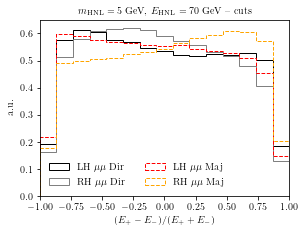

In [282]:
###########
fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)
MIN=-1.0
MAX=1.0

def ilovetoplot(df,var,condition = lambda x : x/x, color='black',label=r'new',density=True,ls='-'):
    out = ax.hist(df[condition][var, ''], 
               bins=15, 
               range=(MIN, MAX),
               weights=df[condition]['weight',], 
               label=label,
                facecolor='None',
              ls=ls,
               edgecolor=color,
               histtype='step',
                density=DENSITY)
    
    
cuts = lambda df : ((df['eplus']>2.2)&(df['eminus']>2.2)&(df['m_t']>2.2))
# cuts = lambda df : ((df['eplus']>0)&(df['eminus']>0)&(df['m_t']>0))

ilovetoplot(df_mumu_LH_dir,'easy', condition = cuts, label=r'LH $\mu\mu$ Dir', color='black',ls='-')
ilovetoplot(df_mumu_RH_dir,'easy', condition = cuts, label=r'RH $\mu\mu$ Dir', color='grey',ls='-')
ilovetoplot(df_mumu_LH_maj,'easy', condition = cuts, label=r'LH $\mu\mu$ Maj', color='red',ls='--')
ilovetoplot(df_mumu_RH_maj,'easy', condition = cuts, label=r'RH $\mu\mu$ Maj', color='orange',ls='--')

# ilovetoplot(df_ee_LH_dir,'easy', label=r'LH $ee$ Dir', color='black')
# ilovetoplot(df_ee_RH_dir,'easy', label=r'RH $ee$ Dir', color='grey')
# ilovetoplot(df_ee_LH_maj,'easy', label=r'LH $ee$ Maj', color='black')
# ilovetoplot(df_ee_RH_maj,'easy', label=r'RH $ee$ Maj', color='grey')


ax.legend(loc='lower left',frameon=False,ncol=2)
ax.set_xlabel(r"$(E_+ - E_-)/(E_++E_-)$")
ax.set_ylabel(r"a.u.")
ax.set_xlim(MIN,MAX)
ax.set_ylim(0.,)
# ax.set_yscale('log')
ax.set_title(r"$m_{\rm HNL} = 5$ GeV, $E_{\rm HNL} = 70$ GeV -- cuts",fontsize=fsize)
plt.savefig("easy_cuts.pdf")

In [ ]:
###########
fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)
MIN=-1.0
MAX=1.0

def ilovetoplot(df,var,condition = lambda x : x/x, color='black',label=r'new',density=True,ls='-'):
    out = ax.hist(df[condition][var, ''], 
               bins=15, 
               range=(MIN, MAX),
               weights=df[condition]['weight',], 
               label=label,
                facecolor='None',
              ls=ls,
               edgecolor=color,
               histtype='step',
                density=DENSITY)
    
    
cuts = lambda df : ((df['eplus']>0)&(df['eminus']>0))

ilovetoplot(df_mumu_LH_dir,'easy', condition = cuts, label=r'LH $\mu\mu$ Dir', color='black',ls='-')
ilovetoplot(df_mumu_RH_dir,'easy', condition = cuts, label=r'RH $\mu\mu$ Dir', color='grey',ls='-')
ilovetoplot(df_mumu_LH_maj,'easy', condition = cuts, label=r'LH $\mu\mu$ Maj', color='red',ls='--')
ilovetoplot(df_mumu_RH_maj,'easy', condition = cuts, label=r'RH $\mu\mu$ Maj', color='orange',ls='--')

# ilovetoplot(df_ee_LH_dir,'easy', label=r'LH $ee$ Dir', color='black')
# ilovetoplot(df_ee_RH_dir,'easy', label=r'RH $ee$ Dir', color='grey')
# ilovetoplot(df_ee_LH_maj,'easy', label=r'LH $ee$ Maj', color='black')
# ilovetoplot(df_ee_RH_maj,'easy', label=r'RH $ee$ Maj', color='grey')


ax.legend(loc='lower left',frameon=False,ncol=2)
ax.set_xlabel(r"$(E_+ - E_-)/(E_++E_-)$")
ax.set_ylabel(r"a.u.")
ax.set_xlim(MIN,MAX)
ax.set_ylim(0.,)
# ax.set_yscale('log')
ax.set_title(r"$m_{\rm HNL} = 5$ GeV, $E_{\rm HNL} = 70$ GeV -- all inclusive",fontsize=fsize)
plt.savefig("easy.pdf")

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


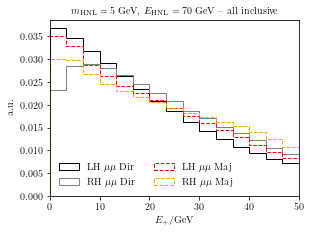

In [267]:
# ###########
fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)
MIN=0.0
MAX=50

def ilovetoplot(df,var,color='black',label=r'new',density=True,ls='-'):
    out = ax.hist(df[var, ''], 
               bins=15, 
               range=(MIN, MAX),
               weights=df['weight',], 
               label=label,
                facecolor='None',
              ls=ls,
               edgecolor=color,
               histtype='step',
                density=DENSITY)
    
VAR='eplus'
ilovetoplot(df_mumu_LH_dir,VAR,label=r'LH $\mu\mu$ Dir', color='black',ls='-')
ilovetoplot(df_mumu_RH_dir,VAR,label=r'RH $\mu\mu$ Dir', color='grey',ls='-')
ilovetoplot(df_mumu_LH_maj,VAR,label=r'LH $\mu\mu$ Maj', color='red',ls='--')
ilovetoplot(df_mumu_RH_maj,VAR,label=r'RH $\mu\mu$ Maj', color='orange',ls='--')

# ilovetoplot(df_ee_LH_dir,VAR, label=r'LH $ee$ Dir', color='black')
# ilovetoplot(df_ee_RH_dir,VAR, label=r'RH $ee$ Dir', color='grey')
# ilovetoplot(df_ee_LH_maj,VAR, label=r'LH $ee$ Maj', color='black')
# ilovetoplot(df_ee_RH_maj,VAR, label=r'RH $ee$ Maj', color='grey')


ax.legend(loc='lower left',frameon=False,ncol=2)
ax.set_xlabel(r"$E_+/$GeV")
ax.set_ylabel(r"a.u.")
ax.set_xlim(MIN,MAX)
ax.set_ylim(0.,)
# ax.set_yscale('log')
ax.set_title(r"$m_{\rm HNL} = 5$ GeV, $E_{\rm HNL} = 70$ GeV -- all inclusive",fontsize=fsize)
plt.savefig("eplus.pdf")

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


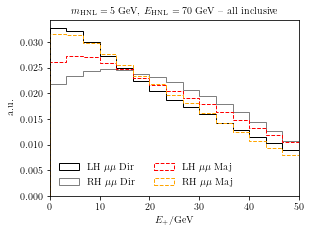

In [268]:
# ###########
fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)
MIN=0.0
MAX=50

def ilovetoplot(df,var,color='black',label=r'new',density=True,ls='-'):
    out = ax.hist(df[var, ''], 
               bins=15, 
               range=(MIN, MAX),
               weights=df['weight',], 
               label=label,
                facecolor='None',
              ls=ls,
               edgecolor=color,
               histtype='step',
                density=DENSITY)
    
VAR='eminus'
ilovetoplot(df_mumu_LH_dir,VAR,label=r'LH $\mu\mu$ Dir', color='black',ls='-')
ilovetoplot(df_mumu_RH_dir,VAR,label=r'RH $\mu\mu$ Dir', color='grey',ls='-')
ilovetoplot(df_mumu_LH_maj,VAR,label=r'LH $\mu\mu$ Maj', color='red',ls='--')
ilovetoplot(df_mumu_RH_maj,VAR,label=r'RH $\mu\mu$ Maj', color='orange',ls='--')

# ilovetoplot(df_ee_LH_dir,VAR, label=r'LH $ee$ Dir', color='black')
# ilovetoplot(df_ee_RH_dir,VAR, label=r'RH $ee$ Dir', color='grey')
# ilovetoplot(df_ee_LH_maj,VAR, label=r'LH $ee$ Maj', color='black')
# ilovetoplot(df_ee_RH_maj,VAR, label=r'RH $ee$ Maj', color='grey')


ax.legend(loc='lower left',frameon=False,ncol=2)
ax.set_xlabel(r"$E_+/$GeV")
ax.set_ylabel(r"a.u.")
ax.set_xlim(MIN,MAX)
ax.set_ylim(0.,)
# ax.set_yscale('log')
ax.set_title(r"$m_{\rm HNL} = 5$ GeV, $E_{\rm HNL} = 70$ GeV -- all inclusive",fontsize=fsize)
plt.savefig("eminus.pdf")

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


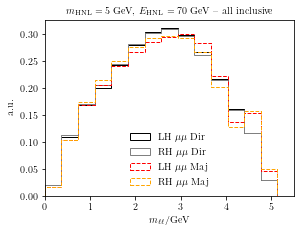

In [241]:
###########
fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)
MIN=0
MAX=5.5

def ilovetoplot(df,var,color='black',label=r'new',density=True,ls='-'):
    out = ax.hist(df[var, ''], 
               bins=15, 
               range=(MIN, MAX),
               weights=df['weight',], 
               label=label,
                facecolor='None',
              ls=ls,
               edgecolor=color,
               histtype='step',
                density=DENSITY)
    
VAR = 'ee_mass'
ilovetoplot(df_mumu_LH_dir,VAR,label=r'LH $\mu\mu$ Dir', color='black',ls='-')
ilovetoplot(df_mumu_RH_dir,VAR,label=r'RH $\mu\mu$ Dir', color='grey',ls='-')
ilovetoplot(df_mumu_LH_maj,VAR,label=r'LH $\mu\mu$ Maj', color='red',ls='--')
ilovetoplot(df_mumu_RH_maj,VAR,label=r'RH $\mu\mu$ Maj', color='orange',ls='--')

# ilovetoplot(df_ee_LH_dir,VAR, label=r'LH $ee$ Dir', color='black')
# ilovetoplot(df_ee_RH_dir,VAR, label=r'RH $ee$ Dir', color='grey')
# ilovetoplot(df_ee_LH_maj,VAR, label=r'LH $ee$ Maj', color='black')
# ilovetoplot(df_ee_RH_maj,VAR, label=r'RH $ee$ Maj', color='grey')


ax.legend(loc='lower center',frameon=False)
ax.set_xlabel(r"$m_{\ell\ell}/$GeV")
ax.set_ylabel(r"a.u.")
ax.set_xlim(MIN,MAX)
# ax.set_ylim(0.5,1.2)
# ax.set_yscale('log')
ax.set_title(r"$m_{\rm HNL} = 5$ GeV, $E_{\rm HNL} = 70$ GeV -- all inclusive",fontsize=fsize)
plt.savefig("invmass.pdf")

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


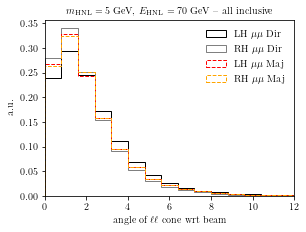

In [240]:
###########
fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)
MIN=0
MAX=12.0
def ilovetoplot(df,var,color='black',label=r'new',density=True,ls='-'):
    out = ax.hist(np.arccos(df[var, ''])*180/np.pi, 
               bins=15, 
               range=(MIN, MAX),
               weights=df['weight',], 
               label=label,
                facecolor='None',
              ls=ls,
               edgecolor=color,
               histtype='step',
                density=DENSITY)
VAR = 'ee_beam_costheta'
ilovetoplot(df_mumu_LH_dir,VAR,label=r'LH $\mu\mu$ Dir', color='black',ls='-')
ilovetoplot(df_mumu_RH_dir,VAR,label=r'RH $\mu\mu$ Dir', color='grey',ls='-')
ilovetoplot(df_mumu_LH_maj,VAR,label=r'LH $\mu\mu$ Maj', color='red',ls='--')
ilovetoplot(df_mumu_RH_maj,VAR,label=r'RH $\mu\mu$ Maj', color='orange',ls='--')

# ilovetoplot(df_ee_LH_dir,VAR, label=r'LH $ee$ Dir', color='black')
# ilovetoplot(df_ee_RH_dir,VAR, label=r'RH $ee$ Dir', color='grey')
# ilovetoplot(df_ee_LH_maj,VAR, label=r'LH $ee$ Maj', color='black')
# ilovetoplot(df_ee_RH_maj,VAR, label=r'RH $ee$ Maj', color='grey')


ax.legend(loc='upper right',frameon=False)
ax.set_xlabel(r"angle of $\ell\ell$ cone wrt beam")
ax.set_ylabel(r"a.u.")
ax.set_xlim(MIN,MAX)
# ax.set_ylim(0.5,1.2)
# ax.set_yscale('log')
ax.set_title(r"$m_{\rm HNL} = 5$ GeV, $E_{\rm HNL} = 70$ GeV -- all inclusive",fontsize=fsize)
plt.savefig("anglebeam.pdf")

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


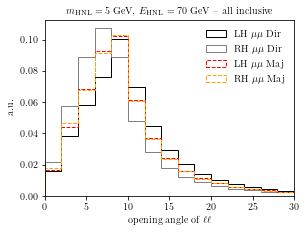

In [239]:
###########
fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)
MIN=0
MAX=30.0
def ilovetoplot(df,var,color='black',label=r'new',density=True,ls='-'):
    out = ax.hist(np.arccos(df[var, ''])*180/np.pi, 
               bins=15, 
               range=(MIN, MAX),
               weights=df['weight',], 
               label=label,
                facecolor='None',
              ls=ls,
               edgecolor=color,
               histtype='step',
                density=DENSITY)
VAR = 'ee_costheta'
ilovetoplot(df_mumu_LH_dir,VAR,label=r'LH $\mu\mu$ Dir', color='black',ls='-')
ilovetoplot(df_mumu_RH_dir,VAR,label=r'RH $\mu\mu$ Dir', color='grey',ls='-')
ilovetoplot(df_mumu_LH_maj,VAR,label=r'LH $\mu\mu$ Maj', color='red',ls='--')
ilovetoplot(df_mumu_RH_maj,VAR,label=r'RH $\mu\mu$ Maj', color='orange',ls='--')

# ilovetoplot(df_ee_LH_dir,VAR, label=r'LH $ee$ Dir', color='black')
# ilovetoplot(df_ee_RH_dir,VAR, label=r'RH $ee$ Dir', color='grey')
# ilovetoplot(df_ee_LH_maj,VAR, label=r'LH $ee$ Maj', color='black')
# ilovetoplot(df_ee_RH_maj,VAR, label=r'RH $ee$ Maj', color='grey')


ax.legend(loc='upper right',frameon=False)
ax.set_xlabel(r"opening angle of $\ell\ell$")
ax.set_ylabel(r"a.u.")
ax.set_xlim(MIN,MAX)
# ax.set_ylim(0.5,1.2)
# ax.set_yscale('log')
ax.set_title(r"$m_{\rm HNL} = 5$ GeV, $E_{\rm HNL} = 70$ GeV -- all inclusive",fontsize=fsize)
plt.savefig("angle.pdf")

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


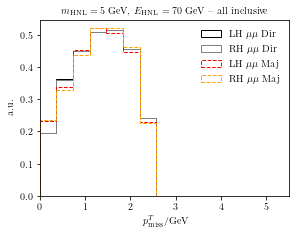

In [279]:
###########
fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)
MIN=0
MAX=5.5

def ilovetoplot(df,var,color='black',label=r'new',density=True,ls='-'):
    out = ax.hist(df[var, ''], 
               bins=15, 
               range=(MIN, MAX),
               weights=df['weight',], 
               label=label,
                facecolor='None',
              ls=ls,
               edgecolor=color,
               histtype='step',
                density=DENSITY)
    
VAR = 'miss_pt'
ilovetoplot(df_mumu_LH_dir,VAR,label=r'LH $\mu\mu$ Dir', color='black',ls='-')
ilovetoplot(df_mumu_RH_dir,VAR,label=r'RH $\mu\mu$ Dir', color='grey',ls='-')
ilovetoplot(df_mumu_LH_maj,VAR,label=r'LH $\mu\mu$ Maj', color='red',ls='--')
ilovetoplot(df_mumu_RH_maj,VAR,label=r'RH $\mu\mu$ Maj', color='orange',ls='--')

# ilovetoplot(df_ee_LH_dir,VAR, label=r'LH $ee$ Dir', color='black')
# ilovetoplot(df_ee_RH_dir,VAR, label=r'RH $ee$ Dir', color='grey')
# ilovetoplot(df_ee_LH_maj,VAR, label=r'LH $ee$ Maj', color='black')
# ilovetoplot(df_ee_RH_maj,VAR, label=r'RH $ee$ Maj', color='grey')


ax.legend(loc='upper right',frameon=False)
ax.set_xlabel(r"$p_{\rm miss}^{T}/$GeV")
ax.set_ylabel(r"a.u.")
ax.set_xlim(MIN,MAX)
# ax.set_ylim(0.5,1.2)
# ax.set_yscale('log')
ax.set_title(r"$m_{\rm HNL} = 5$ GeV, $E_{\rm HNL} = 70$ GeV -- all inclusive",fontsize=fsize)
plt.savefig("misspt.pdf")

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2922: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


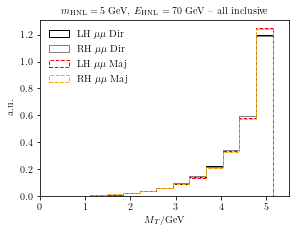

In [278]:
###########
fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)
MIN=0
MAX=5.5

def ilovetoplot(df,var,color='black',label=r'new',density=True,ls='-'):
    out = ax.hist(df[var, ''], 
               bins=15, 
               range=(MIN, MAX),
               weights=df['weight',], 
               label=label,
                facecolor='None',
              ls=ls,
               edgecolor=color,
               histtype='step',
                density=DENSITY)
    
VAR = 'm_t'
ilovetoplot(df_mumu_LH_dir,VAR,label=r'LH $\mu\mu$ Dir', color='black',ls='-')
ilovetoplot(df_mumu_RH_dir,VAR,label=r'RH $\mu\mu$ Dir', color='grey',ls='-')
ilovetoplot(df_mumu_LH_maj,VAR,label=r'LH $\mu\mu$ Maj', color='red',ls='--')
ilovetoplot(df_mumu_RH_maj,VAR,label=r'RH $\mu\mu$ Maj', color='orange',ls='--')

ax.legend(loc='upper left',frameon=False)
ax.set_xlabel(r"$M_{T}/$GeV")
ax.set_ylabel(r"a.u.")
ax.set_xlim(MIN,MAX)
ax.set_title(r"$m_{\rm HNL} = 5$ GeV, $E_{\rm HNL} = 70$ GeV -- all inclusive",fontsize=fsize)
plt.savefig("misspt.pdf")